#House Price Prediction
#predict house price for (5000 sqft,4 bedrooms, 15 years old)
#predict house price for (5000 sqft,4 bedrooms, 20 years old)

In [2]:
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df2 = pd.read_csv(r"C:\Users\hp\repositories\Corizo\AI\House.csv")
df2

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [3]:
df2.isnull().sum()


Area        0
Bedrooms    1
Age         0
Price       0
dtype: int64

In [4]:
print(df2["Bedrooms"].median())


3.5


In [5]:
# The median is the middle value in a list of numbers. If the list has an even number of values, the median is the average of the two middle numbers.
# The median is a measure of central tendency that is less affected by outliers than the mean.
med_bed = math.floor(df2["Bedrooms"].median())
print(med_bed)


3


In [6]:
df2.interpolate()


,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [7]:
df2["Bedrooms"].fillna(med_bed, inplace=True)
df2


C:\Users\hp\AppData\Local\Temp\ipykernel_3736\1377457792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2["Bedrooms"].fillna(med_bed, inplace=True)


,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


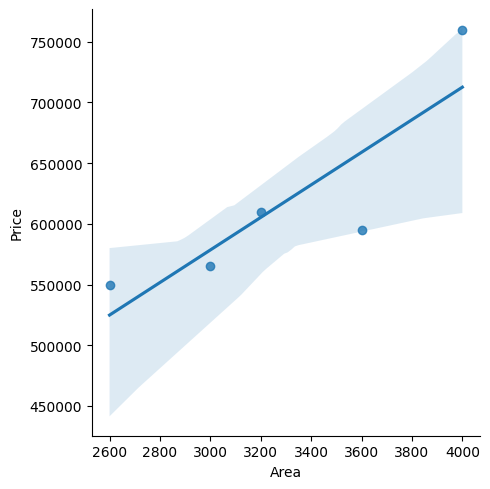

In [8]:
sns.lmplot(x="Area", y="Price", data=df2)


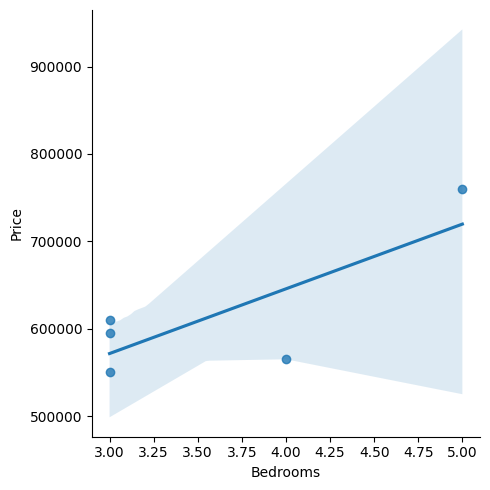

In [9]:
sns.lmplot(x="Bedrooms", y="Price", data=df2)


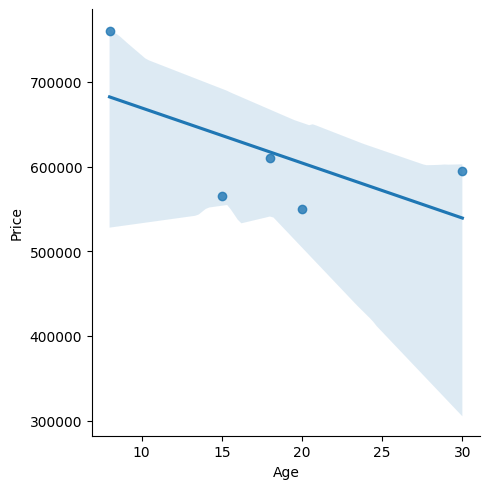

In [10]:
sns.lmplot(x="Age", y="Price", data=df2)


In [11]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(df2[["Area", "Bedrooms", "Age"]], df2[["Price"]])


LinearRegression()

In [12]:
print(model2.predict([[5000, 4, 15]]))
print(model2.predict([[5000, 4, 20]]))


[[863500.]]
[[829375.]]


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(df2[["Area","Bedrooms","Age"]],df2["Price"],train_size=0.8)

In [14]:
xtrain

,Area,Bedrooms,Age
0,2600,3.0,20
3,3600,3.0,30
1,3000,4.0,15
4,4000,5.0,8


In [15]:
xtest

,Area,Bedrooms,Age
2,3200,3.0,18


In [16]:
ytrain

0    550000
3    595000
1    565000
4    760000
Name: Price, dtype: int64

In [17]:
ytest

2    610000
Name: Price, dtype: int64

In [18]:
model2 = LinearRegression()
model2.fit(xtrain,ytrain)


LinearRegression()

In [19]:
ans=model2.predict(xtest)
ans

array([730000.])

In [20]:
model2.score(xtest,ytest)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [21]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse=mean_squared_error(ytest,ans) #ytest- actual,ans - predicted
print(mse)
mae=mean_absolute_error(ytest,ans) #ytest- actual,ans - predicted
print(mse)
rmse=math.sqrt(mse) 
print(rmse)
rsquared=r2_score(ytest,ans) #ytest- actual,ans - predicted
print(rsquared)

14400000000.0
14400000000.0
120000.0
nan


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
